In [11]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from matplotlib import pyplot as plt
import os
import torch

(199680,) (199680,) (199680,)
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     20125
         1.0       0.20      0.52      0.29      1722
         2.0       0.76      0.48      0.59      3111

    accuracy                           0.80     24958
   macro avg       0.64      0.62      0.59     24958
weighted avg       0.87      0.80      0.82     24958



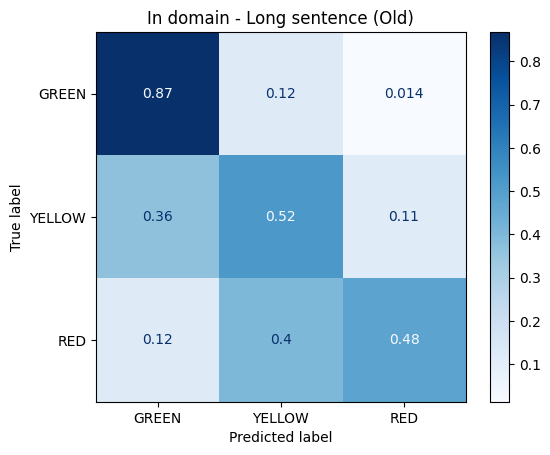

In [20]:
def convert_score_to_color(score, YELLOW_GREEN=75/50, RED_YELLOW=30/50):
    LABEL2ID = {"GREEN": 0, "YELLOW": 1, "RED":2}
    red_index = score < RED_YELLOW
    yellow_index = ((score >= RED_YELLOW).int() & (score < YELLOW_GREEN).int()).bool()
    green_index = score >= YELLOW_GREEN

    score[red_index] = LABEL2ID["RED"]
    score[yellow_index] = LABEL2ID["YELLOW"]
    score[green_index] = LABEL2ID["GREEN"]

    return score

def load_pred_and_label(pred_path, label_path):
    pred = np.load(pred_path)
    label = np.load(label_path)

    pred = np.concatenate(pred)
    label = np.concatenate(label)
    index = label != -1    
    print(index.shape, pred.shape, label.shape)
    
    return label[index], pred[index]
def cal_f1(pred_path, label_path, YELLOW_GREEN=80/50, RED_YELLOW=35/50):
    label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
    
    actual = convert_score_to_color(torch.from_numpy(label), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    predicted = convert_score_to_color(torch.from_numpy(pred), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    
    result = classification_report(y_true=actual, y_pred=predicted)
    cfs_mtr = confusion_matrix(actual, predicted)
    print(result)
    
    cfs_mtr = cfs_mtr / cfs_mtr.sum(axis=1, keepdims=True)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cfs_mtr, display_labels = ["GREEN", "YELLOW", "RED"])
    

    return result, cm_display.plot(cmap='Blues')
    
pred_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/phn_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/phn_label.npy"

res, cm_display = cal_f1(pred_path=pred_path, label_path=label_path, YELLOW_GREEN=80/50, RED_YELLOW=30/50)
plt.title("In domain - Long sentence (Old)")
plt.show() 

(721408,) (721408,) (721408,)
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     99093
         1.0       0.62      0.86      0.72     29986

    accuracy                           0.84    129079
   macro avg       0.78      0.85      0.81    129079
weighted avg       0.87      0.84      0.85    129079



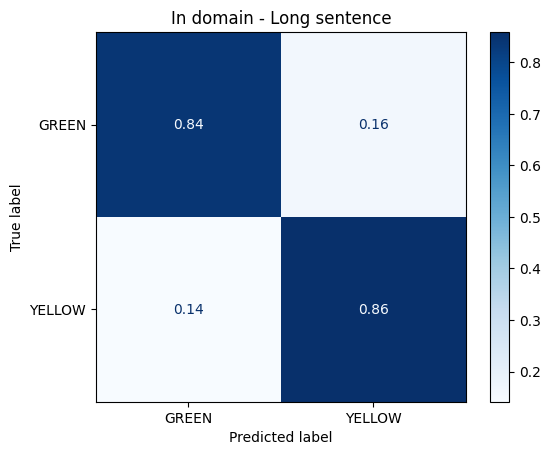

In [36]:
def convert_score_to_color(score, YELLOW_GREEN=75/50, RED_YELLOW=30/50):
    LABEL2ID = {"GREEN": 0, "YELLOW": 1, "RED":1}
    red_index = score < RED_YELLOW
    yellow_index = ((score >= RED_YELLOW).int() & (score < YELLOW_GREEN).int()).bool()
    green_index = score >= YELLOW_GREEN

    score[red_index] = LABEL2ID["RED"]
    score[yellow_index] = LABEL2ID["YELLOW"]
    score[green_index] = LABEL2ID["GREEN"]

    return score

def load_pred_and_label(pred_path, label_path):
    pred = np.load(pred_path)
    label = np.load(label_path)

    pred = np.concatenate(pred)
    label = np.concatenate(label)
    index = label != -1    
    print(index.shape, pred.shape, label.shape)
    
    return label[index], pred[index]
def cal_f1(pred_path, label_path, YELLOW_GREEN=70/50, RED_YELLOW=35/50):
    label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
    
    actual = convert_score_to_color(torch.from_numpy(label), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    predicted = convert_score_to_color(torch.from_numpy(pred), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    
    result = classification_report(y_true=actual, y_pred=predicted)
    cfs_mtr = confusion_matrix(actual, predicted)
    print(result)
    
    cfs_mtr = cfs_mtr / cfs_mtr.sum(axis=1, keepdims=True)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cfs_mtr, display_labels = ["GREEN", "YELLOW"])
    

    return result, cm_display.plot(cmap='Blues')
    
pred_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_short/ckpts-eph=48-mse=0.15719999372959137/phn_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_short/ckpts-eph=48-mse=0.15719999372959137/phn_label.npy"

res, cm_display = cal_f1(pred_path=pred_path, label_path=label_path, YELLOW_GREEN=80/50, RED_YELLOW=30/50)
plt.title("In domain - Long sentence")
plt.show() 

In [23]:
import numpy as np
from sklearn.metrics import classification_report

def load_pred_and_label(pred_path, label_path):
    pred = np.load(pred_path)
    label = np.load(label_path)

    pred = np.concatenate(pred)
    label = np.concatenate(label)
    index = label != -1    
    print(index.shape, pred.shape, label.shape)
    
    return label[index], pred[index]

def cal_utt_acc(pred, label, threshold=10/50):
    _temp = np.abs(pred-label)
    
    pred = _temp < threshold
    label = np.ones_like(_temp)
    
    print(classification_report(y_true=label, y_pred=pred, zero_division=0))

pred_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=43-mse=0.16259999573230743/wrd_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=43-mse=0.16259999573230743/wrd_label.npy"
label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
cal_utt_acc(pred=pred, label=label)

(199680,) (199680,) (199680,)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.51      0.68     24958

    accuracy                           0.51     24958
   macro avg       0.50      0.26      0.34     24958
weighted avg       1.00      0.51      0.68     24958



In [22]:
pred_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/utt_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/utt_label.npy"
label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
cal_utt_acc(pred=pred, label=label)

(1560,) (1560,) (1560,)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.69      0.81      1560

    accuracy                           0.69      1560
   macro avg       0.50      0.34      0.41      1560
weighted avg       1.00      0.69      0.81      1560



In [16]:
pred_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/utt_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/ckpts/in_long_old/ckpts-eph=47-mse=0.16459999978542328/utt_label.npy"
label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
cal_utt_acc(pred=pred, label=label)

(1560,) (1560,) (1560,)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.69      0.81      1560

    accuracy                           0.69      1560
   macro avg       0.50      0.34      0.41      1560
weighted avg       1.00      0.69      0.81      1560

